In [1]:
import torch
import lightning.pytorch as pl
from torchinfo import summary
import torchvision
from matplotlib import pyplot as plt
from lightning.pytorch.tuner import Tuner

In [2]:
torch.set_float32_matmul_precision('medium')

In [3]:
from data import OxfordPetDatamodule
from model import LitUNet
from transformation import mask_transforms,img_trasfroms
from utils import DiceLoss,plot_unet_results,plot_unet_samples

In [4]:
dm = OxfordPetDatamodule(transforms=img_trasfroms,mask_transforms=mask_transforms,batch_size=16)
dm.setup()

In [7]:
model = LitUNet(
    inchannels=3,
    outchannels=3,
    expansion_mode='transponse',
    contraction_mode='maxpool',
    channels_list=[16,32,64,128],
    loss_fn='bce',
    lr=1e-4
)

In [ ]:
summary(model=model, 
        input_size=(16, 3,256,256),
        col_names=[ "input_size", "output_size", "num_params", "params_percent", "kernel_size", "trainable"],
        row_settings=["depth", "var_names"]
)

In [8]:
trainer = pl.Trainer(
    fast_dev_run=False,
    max_epochs=15,
    enable_model_summary=False,
    enable_progress_bar=True,
    # callbacks = [
    #     # EarlyStopping(monitor='train_loss',mode='min',patience=3,verbose=False,check_on_train_epoch_end=True,check_finite=True,),
    #     # LearningRateMonitor(logging_interval='step'),
    #     # ModelCheckpoint(dirpath="experiment",monitor='train_loss',enable_version_counter=True), 
    #     # ModelSummary(max_depth=-1),
    #     # CSVLogger(save_dir='experiments/')
    # ],
    log_every_n_steps=30,
    precision='32'
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [9]:
# tuner = Tuner(trainer)
# lr_finder = tuner.lr_find(model=model, datamodule=dm)
# maxlr = lr_finder.suggestion()
# fig = lr_finder.plot(suggest=True)
# model.lr = maxlr
# model.max_lr = maxlr

In [10]:
trainer.fit(model=model,datamodule=dm)
trainer.validate(model=model,dataloaders=dm)

Missing logger folder: c:\Users\muthu\GitHub\DL-Language 🫶\Ch18\P1\lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.
c:\Users\muthu\miniconda3\envs\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\muthu\miniconda3\envs\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      val_loss_epoch       │    0.38407865166664124    │
└───────────────────────────┴───────────────────────────┘

[{'val_loss_epoch': 0.38407865166664124}]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


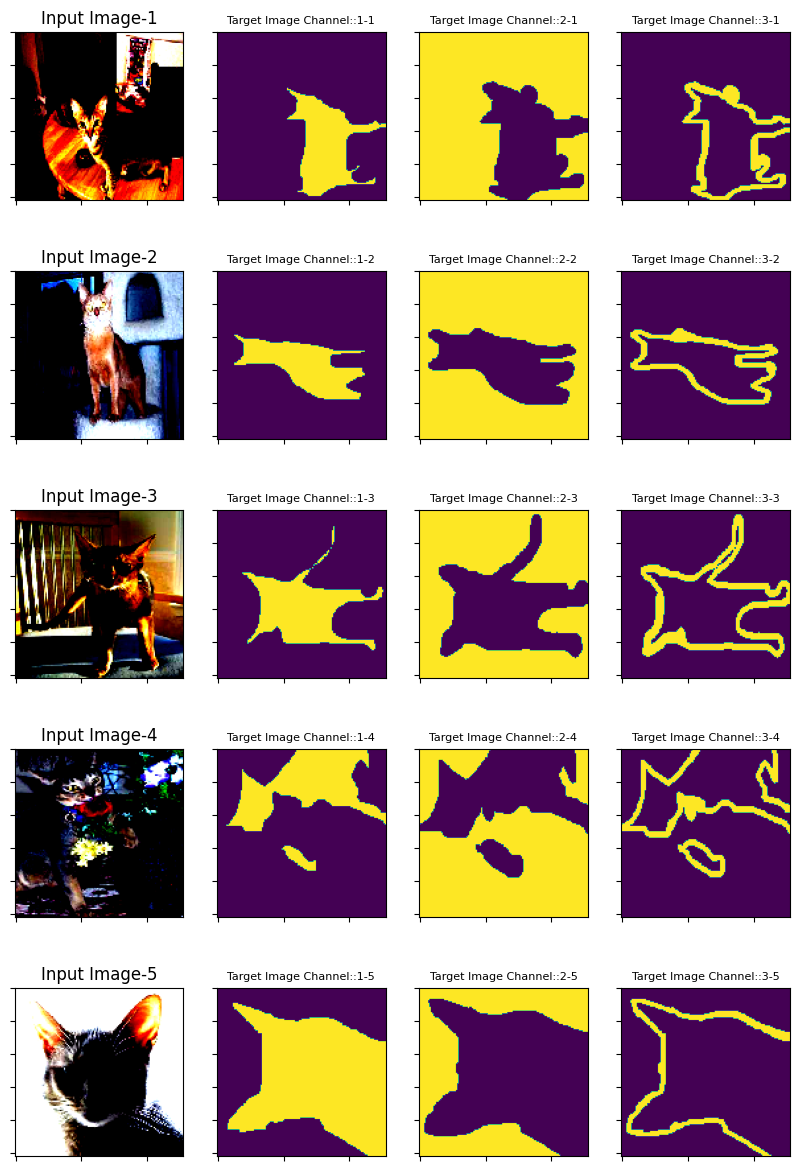

In [58]:
plot_unet_samples(dm)

In [71]:
dm.val_dataset[2][2].shape,dm.val_dataset[2][0].shape

(torch.Size([3, 128, 128]), torch.Size([3, 128, 128]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


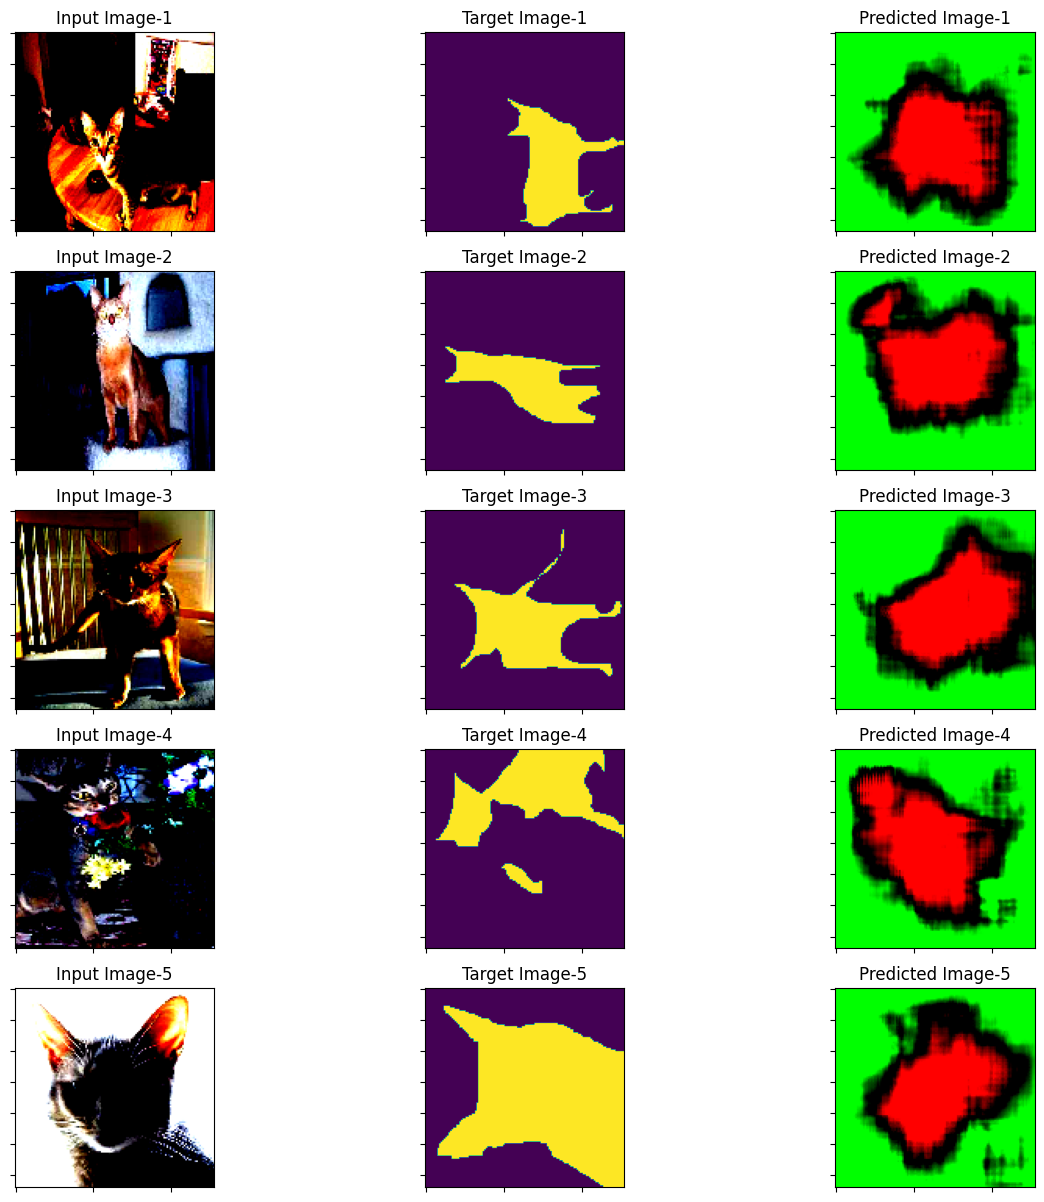

In [72]:
plot_unet_results(model,dm)

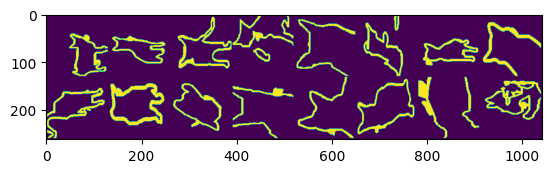

In [28]:
plt.imshow(torchvision.utils.make_grid(ohls).permute(1,2,0)[:,:,2])